In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/open-problems-multimodal/sample_submission.csv
/kaggle/input/open-problems-multimodal/train_cite_targets.h5
/kaggle/input/open-problems-multimodal/test_multi_inputs.h5
/kaggle/input/open-problems-multimodal/evaluation_ids.csv
/kaggle/input/open-problems-multimodal/train_cite_inputs.h5
/kaggle/input/open-problems-multimodal/train_multi_targets.h5
/kaggle/input/open-problems-multimodal/train_multi_inputs.h5
/kaggle/input/open-problems-multimodal/metadata.csv
/kaggle/input/open-problems-multimodal/test_cite_inputs.h5


**TABLE OF CONTENTS (CHECK RIGHT WINDOW) & DON'T FORGET TO UPVOTE IF IT'S USEFULL :)**

# Import necessary libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First look at files

In [7]:
!pip install tables
metadataset=pd.read_csv('../input/open-problems-multimodal/metadata.csv')
#train_cite=pd.read_hdf('../input/open-problems-multimodal/train_cite_inputs.h5')
train_cite_target=pd.read_hdf('../input/open-problems-multimodal/train_cite_targets.h5')

In [8]:
metadataset

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq
...,...,...,...,...,...
281523,96a60b026659,10,31800,hidden,multiome
281524,d493e546991e,10,31800,hidden,multiome
281525,05666c99aa48,10,31800,hidden,multiome
281526,121f946642b5,10,31800,hidden,multiome


In [9]:
train_cite_target

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650ee456f0f3,0.905420,0.386141,0.961590,5.090580,2.854346,6.093729,-0.586178,0.452389,0.040806,0.191407,...,1.261118,3.092832,0.003275,0.278930,-0.272002,0.249477,3.789460,0.138330,1.466193,4.278504
cc506e7707f5,2.101247,2.117462,0.112699,2.065512,2.176803,3.900090,-0.586001,-0.175479,1.363232,0.109905,...,0.714624,5.029233,0.909861,0.057322,2.633387,1.340077,11.456146,-1.431453,5.275882,2.510530
a91f1b55a520,1.221313,0.476566,1.437551,5.135631,2.926102,1.615081,-0.586910,1.760421,1.944711,-0.095096,...,-0.176027,5.027534,-0.703609,1.139491,-0.078092,1.592960,9.358179,0.981883,6.911032,3.415310


# EDA

**Firstly - unique values for each column**

In [10]:
unique_dict={}
for i in metadataset.columns:
    unique_dict[i]=len(metadataset[i].unique())
unique_dict

{'cell_id': 281528, 'day': 5, 'donor': 4, 'cell_type': 8, 'technology': 2}

**Now we need to take a look at values distributions**

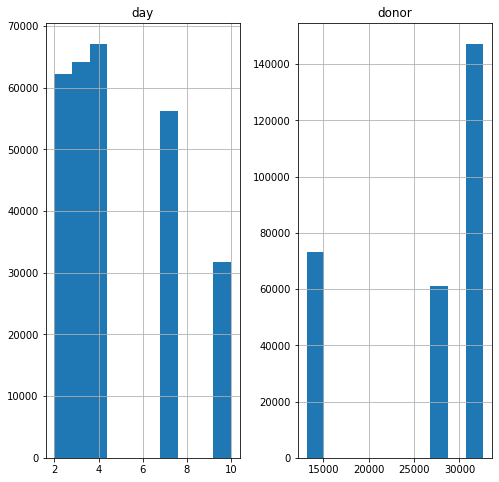

In [11]:
metadataset.hist(figsize=(8,8))
plt.show()

**Common info & scalar metrics about dataset**

In [12]:
metadataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281528 entries, 0 to 281527
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   cell_id     281528 non-null  object
 1   day         281528 non-null  int64 
 2   donor       281528 non-null  int64 
 3   cell_type   281528 non-null  object
 4   technology  281528 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.7+ MB


In [13]:
metadataset.describe()

,day,donor
count,281528.000000,281528.000000
mean,4.606348,26270.952445
std,2.570123,7967.233157
min,2.000000,13176.000000
25%,3.000000,13176.000000
50%,4.000000,31800.000000
75%,7.000000,32606.000000
max,10.000000,32606.000000


**Correlation matrix**

In [14]:
metadataset.corr()

,day,donor
day,1.000000,-0.014052
donor,-0.014052,1.000000


**Features pairplot**

# Distribution plots

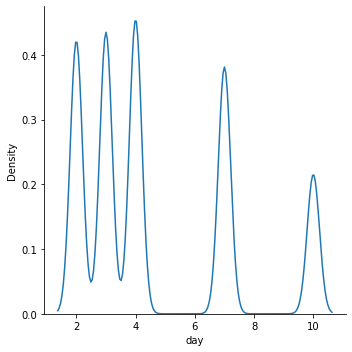

In [15]:
sns.displot(metadataset['day'],kind='kde')
plt.show()

**Day bar distributions**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


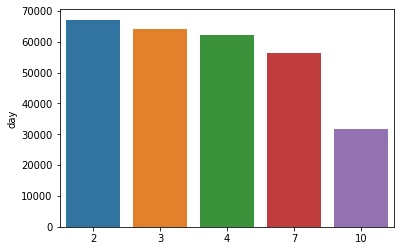

In [16]:
sns.barplot(metadataset['day'].unique(),metadataset['day'].value_counts())
plt.show()

**Donor bar counts**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


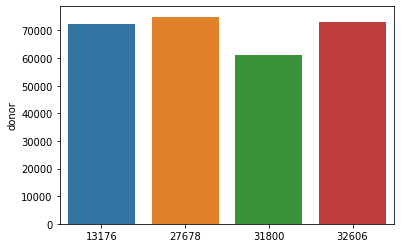

In [17]:
sns.barplot(metadataset['donor'].unique(),metadataset['donor'].value_counts())
plt.show()

**Cell type distributions**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


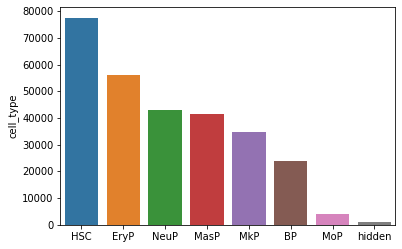

In [18]:
sns.barplot(metadataset['cell_type'].unique(),metadataset['cell_type'].value_counts())
plt.show()

**Technology type**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


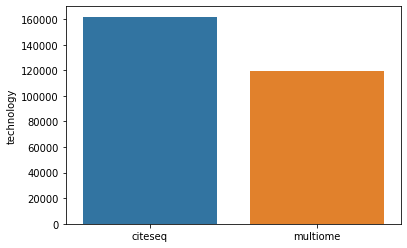

In [19]:
sns.barplot(metadataset['technology'].unique(),metadataset['technology'].value_counts())
plt.show()

# Feature-to-feature dependency

**Cell type bar distributions for each technology type**

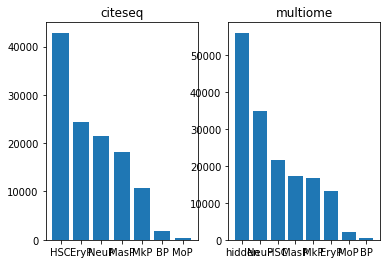

In [51]:
fig, axs = plt.subplots(1, 2)
technology_list=metadataset['technology'].unique()
for i in range(2):
    axs[i].set_title(technology_list[i])
    axs[i].bar(metadataset[metadataset['technology']==technology_list[i]]['cell_type'].unique(), metadataset[metadataset['technology']==technology_list[i]]['cell_type'].value_counts())
plt.show()

**Percentage pie diagram for cell types**

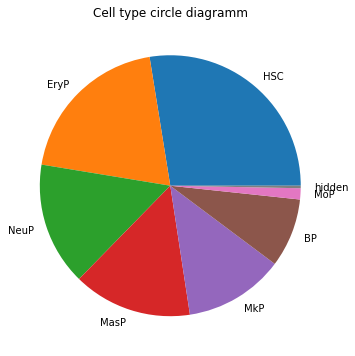

In [38]:

plt.figure(figsize=(6,6))
plt.title('Cell type circle diagramm')
plt.pie(metadataset['cell_type'].value_counts(), labels=metadataset['cell_type'].unique())
plt.show()

**Cell types for each day**

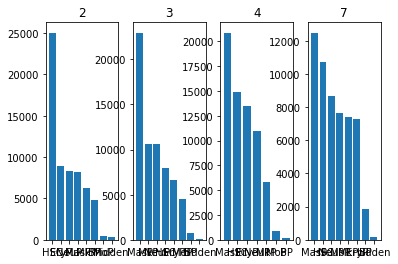

In [46]:
fig, axs = plt.subplots(1, 4)
day_list=metadataset['day'].unique()
for i in range(4):
    axs[i].set_title(day_list[i])
    axs[i].bar(metadataset[metadataset['day']==day_list[i]]['cell_type'].unique(), metadataset[metadataset['day']==day_list[i]]['cell_type'].value_counts())
fig.show()

# Train cite target EDA

In [52]:
train_cite_target

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650ee456f0f3,0.905420,0.386141,0.961590,5.090580,2.854346,6.093729,-0.586178,0.452389,0.040806,0.191407,...,1.261118,3.092832,0.003275,0.278930,-0.272002,0.249477,3.789460,0.138330,1.466193,4.278504
cc506e7707f5,2.101247,2.117462,0.112699,2.065512,2.176803,3.900090,-0.586001,-0.175479,1.363232,0.109905,...,0.714624,5.029233,0.909861,0.057322,2.633387,1.340077,11.456146,-1.431453,5.275882,2.510530
a91f1b55a520,1.221313,0.476566,1.437551,5.135631,2.926102,1.615081,-0.586910,1.760421,1.944711,-0.095096,...,-0.176027,5.027534,-0.703609,1.139491,-0.078092,1.592960,9.358179,0.981883,6.911032,3.415310


In [53]:
train_cite_target.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70988 entries, 45006fe3e4c8 to c91b6b2ccd3d
Columns: 140 entries, CD86 to CD224
dtypes: float32(140)
memory usage: 38.5+ MB


In [54]:
train_cite_target.describe()

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
count,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,...,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000,70988.000000
mean,0.454768,0.466369,0.918049,5.610967,5.307707,7.447880,4.052779,0.399293,0.714440,0.840576,...,0.269132,7.229657,0.871969,0.240155,0.236248,0.777902,5.375080,0.629204,3.608978,3.418748
std,1.393927,0.894457,0.923267,2.542798,2.043094,3.593255,5.332760,1.055089,0.858400,1.245953,...,0.835048,3.189166,1.135966,0.736558,1.801219,0.943353,2.876905,1.363843,2.722020,2.465487
min,-5.717155,-5.292869,-4.187119,-3.907870,-3.107560,-4.439901,-8.152050,-4.893185,-4.166430,-3.502274,...,-6.492634,-9.677796,-6.471857,-7.369277,-5.951009,-2.352817,-14.125098,-2.993998,-29.403835,-4.654044
25%,-0.366943,-0.144443,0.289499,3.830644,3.961191,4.861448,0.257704,-0.315521,0.144492,-0.028824,...,-0.294844,5.033357,0.070054,-0.231999,-0.286252,0.123200,3.295399,-0.110286,1.666111,1.606031
50%,-0.031319,0.416705,0.892687,5.395159,5.324531,7.269966,2.225405,0.302452,0.696771,0.694199,...,0.259515,7.037832,0.762008,0.237440,-0.121567,0.743739,5.057893,0.474196,2.945657,3.011245
75%,1.050250,1.014566,1.519067,7.176124,6.682766,9.791561,6.408164,0.987647,1.268129,1.524002,...,0.815943,9.227937,1.535960,0.703372,0.040861,1.386421,7.130883,1.124541,5.183252,4.826133
max,37.034649,8.832175,6.191772,18.115868,14.311632,27.746946,44.257801,22.913204,4.842474,13.358733,...,5.813220,23.441250,11.292436,5.764631,77.956345,7.225060,22.147051,26.483639,14.911215,18.671375


In [55]:
train_cite_target.corr()

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
gene_id,,,,,,,,,,,,,,,,,,,,,
CD86,1.000000,0.065325,0.075298,0.112736,0.084708,0.132777,0.301286,0.048008,0.039475,0.109858,...,0.052656,0.094544,0.037857,0.086714,0.198925,0.063949,0.003345,0.277128,-0.053687,0.088765
CD274,0.065325,1.000000,0.264809,0.140884,0.112657,0.065413,-0.027188,0.161715,0.270617,0.125194,...,0.205164,0.055029,0.216886,0.258852,0.042335,0.221486,0.134908,0.133606,0.206977,0.175794
CD270,0.075298,0.264809,1.000000,0.294972,0.235210,0.173076,0.037174,0.213361,0.394816,0.201015,...,0.230121,0.190674,0.304055,0.287025,0.061454,0.323635,0.287165,0.166684,0.352414,0.302839
CD155,0.112736,0.140884,0.294972,1.000000,0.621655,0.453057,0.314290,0.105574,0.259327,0.253111,...,0.132740,0.420562,0.162367,0.214365,0.049744,0.266726,0.265603,0.158640,0.150125,0.444210
CD112,0.084708,0.112657,0.235210,0.621655,1.000000,0.496515,0.326109,0.126814,0.172926,0.291199,...,0.135582,0.303669,0.029437,0.235231,0.044869,0.225924,0.070174,0.142907,-0.081457,0.353021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HLA-E,0.063949,0.221486,0.323635,0.266726,0.225924,0.174557,0.042835,0.196570,0.340098,0.198689,...,0.204017,0.147855,0.254109,0.249695,0.048152,1.000000,0.240479,0.142223,0.274970,0.265468
CD82,0.003345,0.134908,0.287165,0.265603,0.070174,0.119754,-0.122642,0.149752,0.292969,0.095816,...,0.093729,0.292801,0.257289,0.110125,-0.024129,0.240479,1.000000,-0.006108,0.442668,0.288597
CD101,0.277128,0.133606,0.166684,0.158640,0.142907,0.166546,0.332668,0.071859,0.141015,0.185745,...,0.121352,0.141976,0.097252,0.181408,0.378041,0.142223,-0.006108,1.000000,0.008480,0.156781


**WORK IN PROCESS :)**